Simple Linear Regression

In [1]:
import torch

In [2]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0,requires_grad=True)

In [3]:
def forward(x):
  y = w * x + b
  return y

In [11]:
x = torch.tensor([1.0])

In [12]:
yhat = forward(x)
yhat

tensor([4.], grad_fn=<AddBackward0>)

Using Class Linear

In [13]:
from torch.nn import Linear

In [14]:
model = Linear(in_features=1,out_features=1)

In [15]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.1508]], requires_grad=True), Parameter containing:
tensor([-0.1273], requires_grad=True)]


In [17]:
yhat = model(x)
yhat

tensor([0.0234], grad_fn=<ViewBackward0>)

In [22]:
model_1 = Linear(in_features=2, out_features=1)
print(list(model_1.parameters()))

[Parameter containing:
tensor([[-0.5607, -0.5147]], requires_grad=True), Parameter containing:
tensor([0.0007], requires_grad=True)]


In [29]:
x_1 = torch.tensor([[1.0,2.0]])

In [31]:
yhat = model_1(x_1)
yhat

tensor([[-1.5893]], grad_fn=<AddmmBackward0>)

Custom Module

In [32]:
import torch.nn as nn

In [34]:
class LR(nn.Module):
  def __init__(self,in_Size,output_size):
    super(LR,self).__init__()
    self.linear = nn.Linear(in_Size,output_size)
  def forward(self,x):
    out = self.linear(x)
    return out

In [35]:
model = LR(1,1)

In [36]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7926]])),
             ('linear.bias', tensor([-0.9467]))])

In [37]:
model.state_dict()['linear.weight']

tensor([[0.7926]])

In [38]:
model.state_dict()['linear.weight'].data[0]

tensor([0.7926])

In [39]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.7926]], requires_grad=True), Parameter containing:
tensor([-0.9467], requires_grad=True)]


In [40]:
x = torch.tensor([1.0],requires_grad=True)

In [41]:
yhat = model(x)
yhat

tensor([-0.1542], grad_fn=<ViewBackward0>)

Gradient Descent

In [42]:
import torch

In [58]:
w = torch.tensor(3.0,requires_grad=True)

In [59]:
x = torch.arange(-3,3,0.1).view(-1,1)
x.size()

torch.Size([60, 1])

In [60]:
f = -3 * x

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

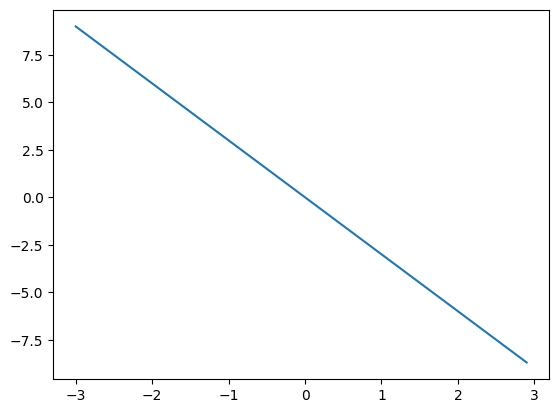

In [62]:
plt.plot(x.numpy(),f.numpy())
plt.show()

In [63]:
y = f + 0.1 * torch.randn(x.size())

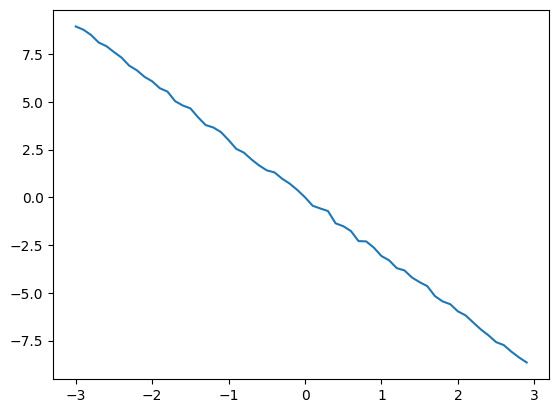

In [64]:
plt.plot(x.numpy(),y.numpy())
plt.show()

In [65]:
def forward(x):
  return w * x

In [66]:
def criterion(yhat,y):
  return torch.mean((yhat - y)**2)

In [69]:
lr = 0.1
cost = []
for epoch in range(4):
  yhat = forward(x)
  loss = criterion(yhat,y)
  cost.append(loss.item())
  loss.backward()
  w.data = w.data - lr * w.grad.data
  w.grad.data.zero_()

In [70]:
print(cost)

[0.07834815979003906, 0.019142189994454384, 0.009685025550425053, 0.008174385875463486]


Simple Linear regression Pytorch(hard way)

In [90]:
def forward_1(x):
  y = w_1 * x + b_1
  return y

In [91]:
def criterion_1(yhat,y):
  return torch.mean((yhat-y)**2)

In [92]:
w_1 = torch.tensor(2.0,requires_grad=True)
b_1 = torch.tensor(1.0,requires_grad=True)

In [93]:
x = torch.arange(-3,3,0.1).view(-1,1)

In [94]:
f = 3 * x

In [95]:
y = f + 0.1 *  torch.randn(x.size())

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

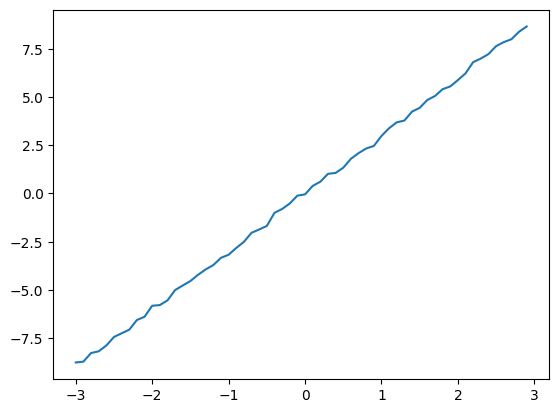

In [97]:
plt.plot(x.numpy(),y.numpy())
plt.show()

In [98]:
lr = 0.1
cost =[]
for epoch in range(4):
  yhat = forward_1(x)
  loss = criterion_1(yhat,y)
  cost.append(loss.item())
  loss.backward()
  w_1.data = w_1.data - lr * w_1.grad.data
  w_1.grad.data.zero_()
  b_1.data = b_1.data - lr * b_1.grad.data
  b_1.grad.data.zero_()

In [99]:
print(cost)

[4.131878852844238, 1.1345878839492798, 0.4889717996120453, 0.2787412106990814]


Stochastic Gradient Descent

In [126]:
import torch

In [127]:
slope = torch.tensor(3.0,requires_grad=True)
bias = torch.tensor(1.0, requires_grad=True)

In [128]:
x_points= torch.arange(-3,3,0.1).view(-1,1)

In [129]:
fun = 3 * (x_points)

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

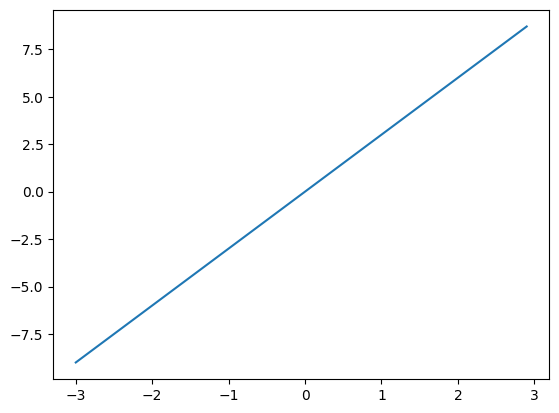

In [131]:
plt.plot(x_points.numpy(),fun.numpy())
plt.show()

In [143]:
y_fun = fun + 0.1 *  torch.randn(x_points.size())

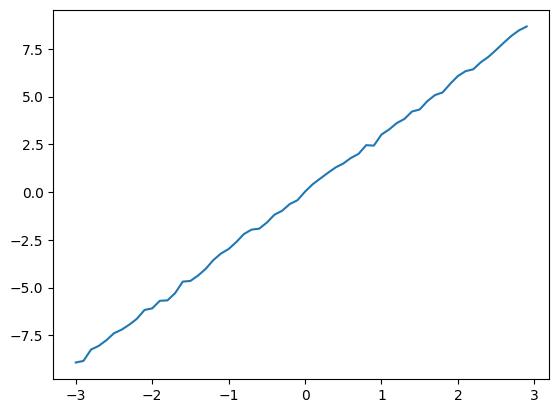

In [145]:
plt.plot(x_points.numpy(),y_fun.numpy())
plt.show()

In [146]:
def forward(x):
  y = slope * x + bias
  return y

In [147]:
def cri(yhat,y):
  return torch.mean((yhat - y)**2)

In [150]:
lr = 0.1
cost = []
for epoch in range(4):
  total_loss = 0
  for x_samples,y_samples in zip(x_points,y_fun):
    yhat = forward(x_samples)
    loss = cri(yhat,y_samples)
    loss.backward()
    slope.data = slope.data - lr * slope.grad.data
    bias.data = bias.data - lr * bias.grad.data
    slope.grad.data.zero_()
    bias.grad.data.zero_()
    total_loss += loss.item()
  cost.append(total_loss)

In [151]:
print(cost)

[938.0488480332424, 214.53516158451748, 41.282387918883614, 16.116611807839945]


SGD with DataLoader

In [152]:
from torch.utils.data import Dataset,DataLoader

In [153]:
class pre(Dataset):
  def __init__(self):
    self.a =  torch.arange(-3,3,0.1).view(-1,1)
    self.b = 3 * self.a + 1
    self.len = self.a.shape[0]
  def __getitem__(self,index):
    return self.a[index],self.b[index]
  def __len__(self):
    return self.len

In [154]:
d = pre()

In [155]:
trainloader = DataLoader(dataset = d,batch_size = 1)

In [156]:
lr = 0.1
cost =[]
for epoch in range(4):
  tot_loss = 0
  for c,d in trainloader:
    yhat = forward(c)
    loss = cri(yhat,d)
    loss.backward()
    slope.data = slope.data - lr * slope.grad.data
    bias.data = bias.data - lr * bias.grad.data
    slope.grad.data.zero_()
    bias.grad.data.zero_()
    tot_loss += loss.item()
  cost.append(tot_loss)

In [157]:
print(cost)

[0.6650174349633744, 1.717980834253467, 0.40877147509399947, 0.09725691220000954]


mini batch Gradient Descent

In [163]:
da = pre()

In [164]:
trainloader_mini = DataLoader(dataset = da,batch_size = 5)

In [165]:
lr = 0.1
cost =[]
for epoch in range(4):
  tot_loss = 0
  for c,d in trainloader_mini:
    yhat = forward(c)
    loss = cri(yhat,d)
    loss.backward()
    slope.data = slope.data - lr * slope.grad.data
    bias.data = bias.data - lr * bias.grad.data
    slope.grad.data.zero_()
    bias.grad.data.zero_()
    tot_loss += loss.item()
  cost.append(tot_loss)

In [166]:
print(cost)

[0.012097454085960635, 1.9279086123976524e-06, 7.058531656303074e-12, 1.7244872227814334e-12]


Optimization in pytorch

In [167]:
import torch.nn as nn

In [179]:
class lr(nn.Module):
  def __init__(self,in_size,out_size):
    super(lr,self).__init__()
    self.linear = nn.Linear(in_size,out_size)
  def forward(self,i):
    o = self.linear(i)
    return o

In [180]:
dat = pre()

In [181]:
cr = nn.MSELoss()

In [182]:
mo = lr(1,1)

In [172]:
import torch.optim as optim

In [183]:
optimizer = optim.SGD(mo.parameters(),lr=0.01)

In [184]:
for epoch in range(4):
  for sample1,sample2 in trainloader:
    pred = forward(sample1)
    lo = cr(pred, sample2)
    optimizer.zero_grad()
    lo.backward()
    optimizer.step()

Training, Validation and Test split

In [202]:
from torch.utils.data import Dataset,DataLoader

In [231]:
class our_dataset(Dataset):
  def __init__(self,train=True):
    self.x = torch.arange(-3,3,0.1).view(-1,1)
    self.f = -3 * self.x + 1
    self.y = self.f + 0.1 * torch.randn(self.x.size())
    self.len = self.x.shape[0]

    if train == True:
      self.y[0] = 0
      self.y[50:55] = 20
    else:
      pass
  def __getitem__(self,index):
    return self.x[index],self.y[index]
  def __len__(self):
    return self.len

In [232]:
train_data = our_dataset()
val_data = our_dataset(train=False)

In [233]:
import torch.nn as nn

In [234]:
class our_lin(nn.Module):
  def __init__(self,in_size,out_size):
    super(our_lin,self).__init__()
    self.linear = nn.Linear(in_size,out_size)
  def forward(self,k):
    f = self.linear(k)
    return f

In [235]:
criterion_fun = nn.MSELoss()

In [236]:
loader = DataLoader(dataset=train_data,batch_size=1)

In [250]:
learning_rates = [0.002, 0.005, 0.008, 0.01, 0.012, 0.015]
epochs = 500
validation_error = []
train_error = []
Models =[]

In [251]:
import torch.optim as optim

In [252]:
for i,learning_rate in enumerate(learning_rates):
  mode = our_lin(1,1)
  optimizer = optim.SGD(mode.parameters(),lr=learning_rate)
  for epoch in range(epochs):
    for sam1, sam2 in loader:
      yhat = mode(sam1)
      loss = criterion_fun(yhat,sam2)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  yhat = mode(train_data.x)
  loss = criterion_fun(yhat,train_data.y)
  train_error.append(loss.item())
  yhat = mode(val_data.x)
  loss = criterion_fun(yhat,val_data.x)
  validation_error.append(loss.item())
  Models.append(mode)


In [253]:
import numpy as np

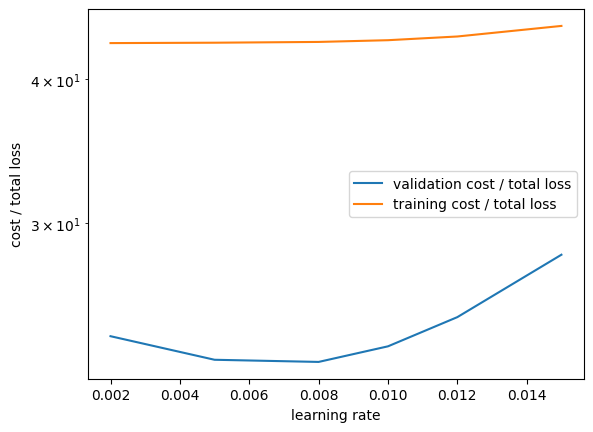

Plotting predictions...


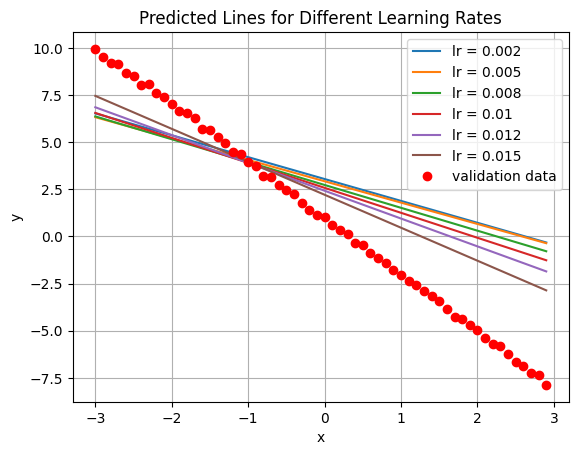

In [254]:
# Cost Plot
plt.semilogy(np.array(learning_rates), np.array(validation_error), label='validation cost / total loss')
plt.semilogy(np.array(learning_rates), np.array(train_error), label='training cost / total loss')
plt.ylabel('cost / total loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

# Line predictions
print("Plotting predictions...")
for model, learning_rate in zip(Models, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy().flatten(),
             yhat.detach().numpy().flatten(),
             label='lr = ' + str(learning_rate))

plt.plot(val_data.x.numpy().flatten(), val_data.y.numpy().flatten(), 'or', label='validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted Lines for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()
